In [1]:
import sys
sys.path = ["/home/aunai/PHARE/pyphare"] + sys.path

In [2]:
from pyphare.pharesee.run import Run
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as gf
from numpy import polyfit
from scipy.signal import find_peaks
%matplotlib widget

In [4]:
root_path = "/home/aunai/formationfluidecinetique/weak_perturbations"

In [16]:
def get_velocities(r,times):
    for it,t in enumerate(times):
        Vi = r.GetVi(t, merged=True)
        Vix = Vi["Vx"][0]
        xV = Vi["Vx"][1][0]
        v = gf(Vix(xV),6)
        if it==0 :
            vt = np.zeros((len(v),len(times)))
        vt[:,it] = v
    return xV, vt


def get_peaks(x,Vs):
    nt = Vs.shape[1]
    positions  = np.zeros((nt,2))
    amplitudes = np.zeros((nt,2))
    for it in range(nt):
        ps = find_peaks(Vs[:,it], height=0.010)
        if (len(ps[0])==1):
            positions[it,0] = x[ps[0]]
            positions[it,1] = x[ps[0]]
            amplitudes[it,0]  = Vs[ps[0][0], it]
            amplitudes[it,1]  = Vs[ps[0][0],it]
        else:
            positions[it,0]  = x[ps[0][0]]
            positions[it,1]  = x[ps[0][1]]
            amplitudes[it,0]  = Vs[ps[0][0], it]
            amplitudes[it,1]  = Vs[ps[0][1],it]
    return positions, amplitudes


def profiles(times, x, Vs, positions, temperature):
    fig, ax = plt.subplots()
    for it,t in enumerate(times):
        ax.plot(x, Vs[:,it], label=r"t={:6.4f}".format(t))
        ax.set_ylim((-0.03, 0.1))
        ax.axhline(0, ls='--', color='k')
        for p in positions[it,:]:
            ax.axvline(p, color="gray", ls="-.")
    ax.set_title("T = {:6.4f}".format(temperature))
    ax.legend()
    
    
def propagation(times, positions, temperature):
    fig,ax = plt.subplots()
    ax.plot(times,positions[:,0], marker="o", color="r", ls="None")
    vl,originl = polyfit(times, positions[:,0], 1)
    ax.plot(times, times*vl+originl, color="r")

    ax.plot(times,positions[:,1], marker="o", color="b", ls="None")
    vr,originr = polyfit(times, positions[:,1], 1)
    ax.plot(times, times*vr+originr, color="b")
    ax.set_title("T = {:6.4f}, Vl = {:6.4f}, Vr = {:6.4f}".format(temperature, vl, vr))
    
    
def damping(times, amplitudes, **kw):
    fig,ax = plt.subplots()
    ax.plot(times,amplitudes[:,0], marker="o", color="r", ls="None")
    ax.plot(times,amplitudes[:,1], marker="o", color="b", ls="None")
    ax.set_ylim((0,0.1))

In [21]:
paths = {0.1:"wp1",
         0.01:"wp2"}

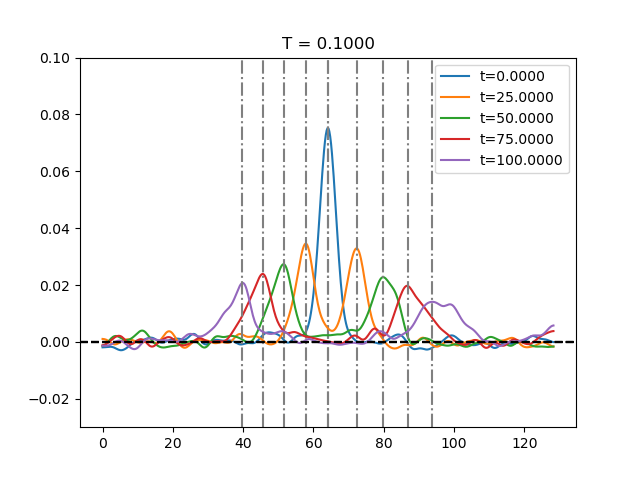

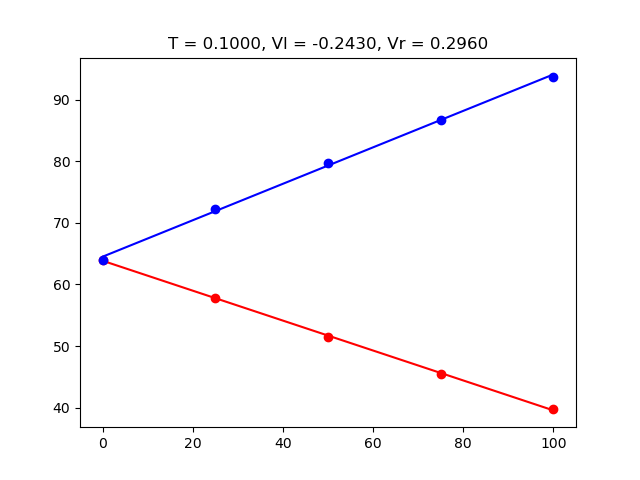

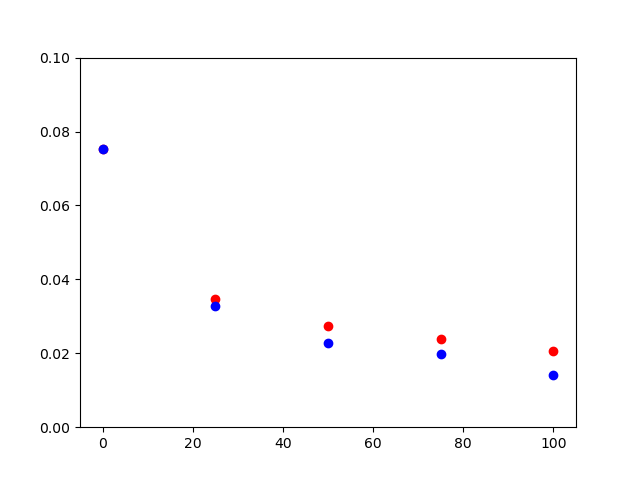

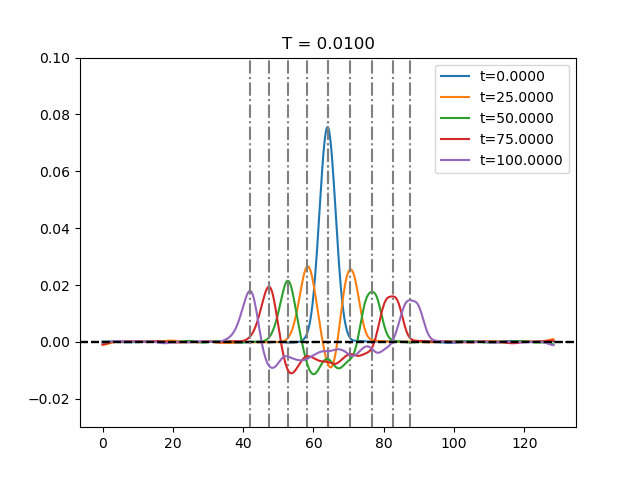

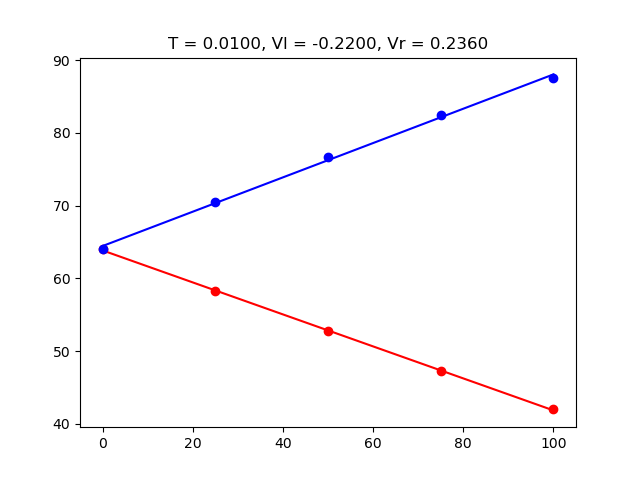

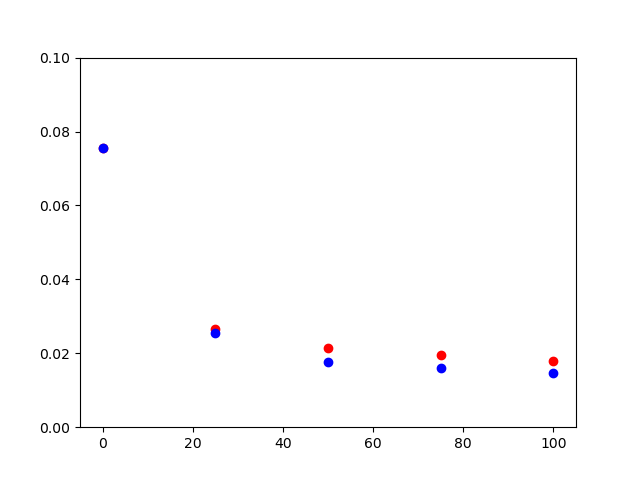

In [22]:
for temperature, path in paths.items():
    r = Run(root_path+"/"+path)
    times   = np.asarray((0,25,50,75,100))
    x, Vs   = get_velocities(r,times)
    positions, amplitudes = get_peaks(x,Vs)
    profiles(times, x, Vs, positions, temperature)
    propagation(times, positions, temperature)
    damping(times, amplitudes)

In [181]:
times  = np.asarray((0,25,50,75,100))
x,Vs   = get_velocities(times)
positions, amplitudes = get_peaks(x,Vs)

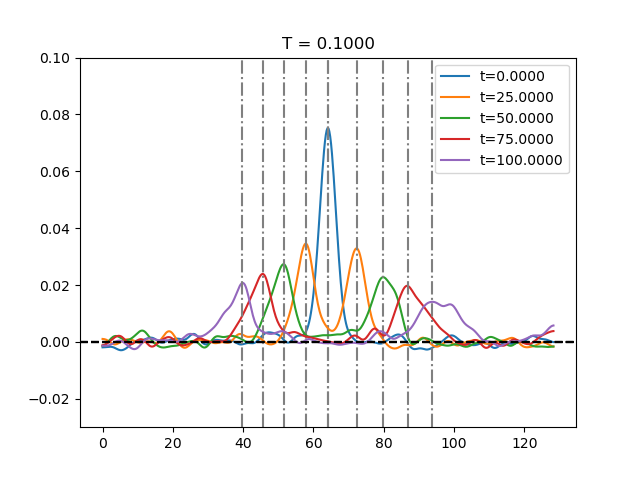

In [194]:
profiles(times, x, Vs, positions, 0.1)

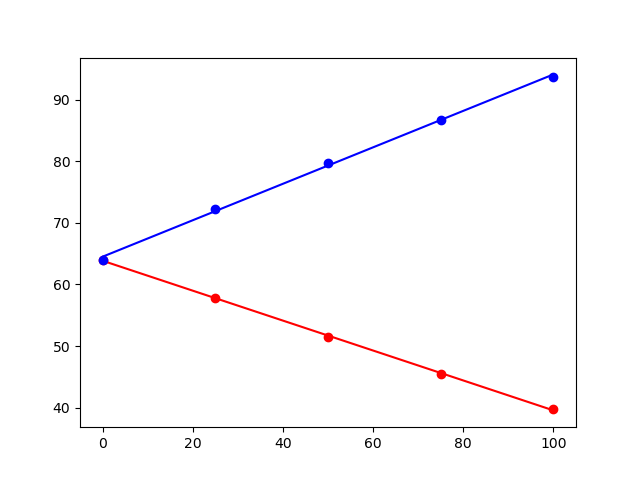

In [186]:
fig,ax = plt.subplots()
ax.plot(times,positions[:,0], marker="o", color="r", ls="None")
vl,originl = polyfit(times, positions[:,0], 1)
ax.plot(times, times*vl+originl, color="r")

ax.plot(times,positions[:,1], marker="o", color="b", ls="None")
vr,originr = polyfit(times, positions[:,1], 1)
ax.plot(times, times*vr+originr, color="b")

In [187]:
amplitudes

array([[0.07520029, 0.07520029],
       [0.03457688, 0.03291017],
       [0.02733594, 0.02276327],
       [0.02391303, 0.01972055],
       [0.02073203, 0.01410408]])

(0.0, 0.1)

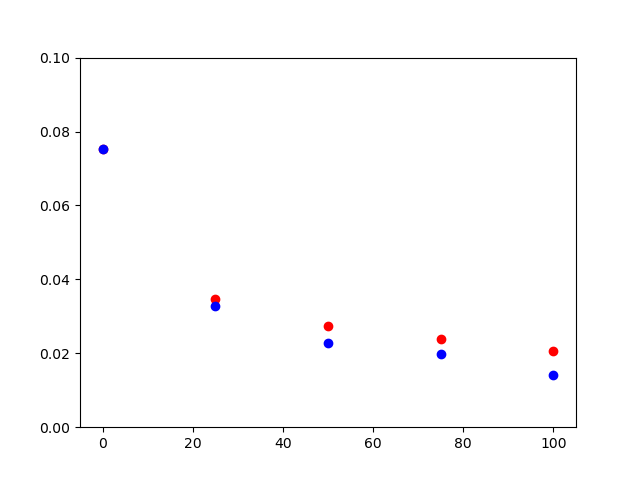

In [189]:
fig,ax = plt.subplots()
ax.plot(times,amplitudes[:,0], marker="o", color="r", ls="None")
ax.plot(times,amplitudes[:,1], marker="o", color="b", ls="None")
ax.set_ylim((0,0.1))

In [65]:
def profiles(times, x, Vs):
    fig, ax = plt.subplots()
    for it,t in enumerate(times):
        ax.plot(x, Vs[:,it], label=r"t={:5.2f}".format(t))
        ax.set_ylim((-2.5, 2.5))
        ax.axhline(0, ls='--', color='k')
    ax.legend(ncol=4)
    

In [66]:
root_path = "/home/aunai/formationfluidecinetique/strong_perturbation"
paths = {1.5:"sp2",}

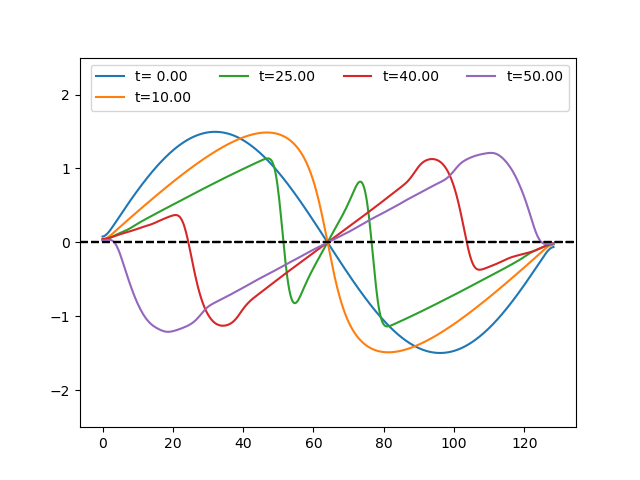

In [67]:
for V0, path in paths.items():
    r = Run(root_path+"/"+path)
    times   = np.asarray((0,10,25,40,50))
    x, Vs   = get_velocities(r,times)
    profiles(times, x, Vs)

In [68]:
times =np.arange(0,50.5,0.5)
r = Run(root_path+"/"+paths[1.5])
for it,t in enumerate(times):
    fig,ax = plt.subplots()
    Vi = r.GetVi(t, merged=True)
    Vix = Vi["Vx"][0]
    xV = Vi["Vx"][1][0]
    ax.plot(xV, Vix(xV))
    ax.set_title("t = {:5.2f}".format(t))
    ax.set_ylim((-2.5, 2.5))
    ax.axhline(0, ls='--', color='k')
    fig.savefig("Vx_sp_{:04d}.png".format(it))
    plt.close("all")

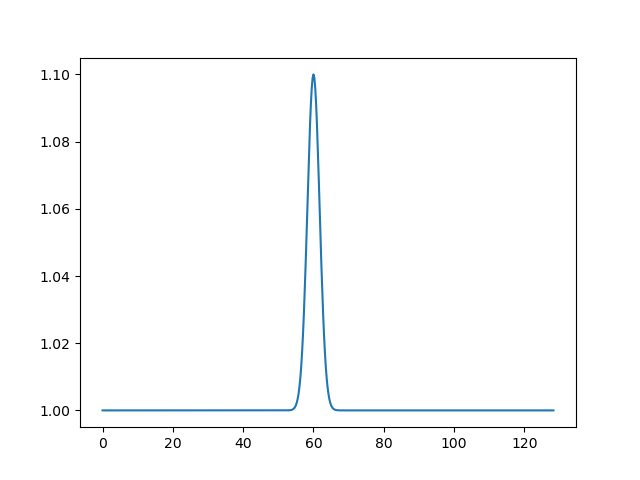

In [37]:
fig,ax = plt.subplots()
ax.plot(x, 1+0.1*np.exp(-(x-60)**2/6))